In [1]:
import os
import coremltools
from PIL import Image
from tqdm.auto import tqdm
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

#### Загрузка модели Core ML и тестовых данных

In [2]:
model = coremltools.models.MLModel('WasteImageClassifier_a.mlmodel')
test_dir = 'test2'

#### Классы тестовых данных

In [3]:
labels = os.listdir(test_dir)
n_labels = len(labels)
labels

['milkbox',
 'penholder',
 'traditionalChinesemedicine',
 'toothpick',
 'bulb',
 'XLight',
 'plasticbag',
 'thermometer',
 'napkin',
 'bowlsanddishes',
 'newspaper',
 'carton',
 'plasticene',
 'rag',
 'leaflet',
 'bandaid',
 'facialmask',
 'glassbottle',
 'pesticidebottle',
 'watermelonrind',
 'tabletcapsule',
 'medicinebottle',
 'bread',
 'toothpastetube',
 'cigarettebutt',
 'battery',
 'leftovers',
 'nailpolishbottle',
 'toothbrush',
 'chopsticks',
 'plasticbottle',
 'cans',
 'diapers',
 'nut']

#### Списки для хранения фактических меток и предсказанных меток

In [4]:
y_true = []
y_pred = []

#### Прохождение по всем изображениям в папке тестовых данных, для выполнения предсказания модели для каждого изображения и запись значений в фактическую и предсказанную метку

In [5]:
for label_idx, label in tqdm(enumerate(labels)):
    label_dir = os.path.join(test_dir, label)
    for image_file in tqdm(os.listdir(label_dir)):
        image_path = os.path.join(label_dir, image_file)
        image = Image.open(image_path).resize((299, 299))
        if image.mode != 'RGB':
             image = image.convert('RGB')
        predicted_label = model.predict({'image': image})['classLabel']
        y_true.append(label)
        y_pred.append(predicted_label)

0it [00:00, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/299 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/327 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

#### Построение confusion matrix

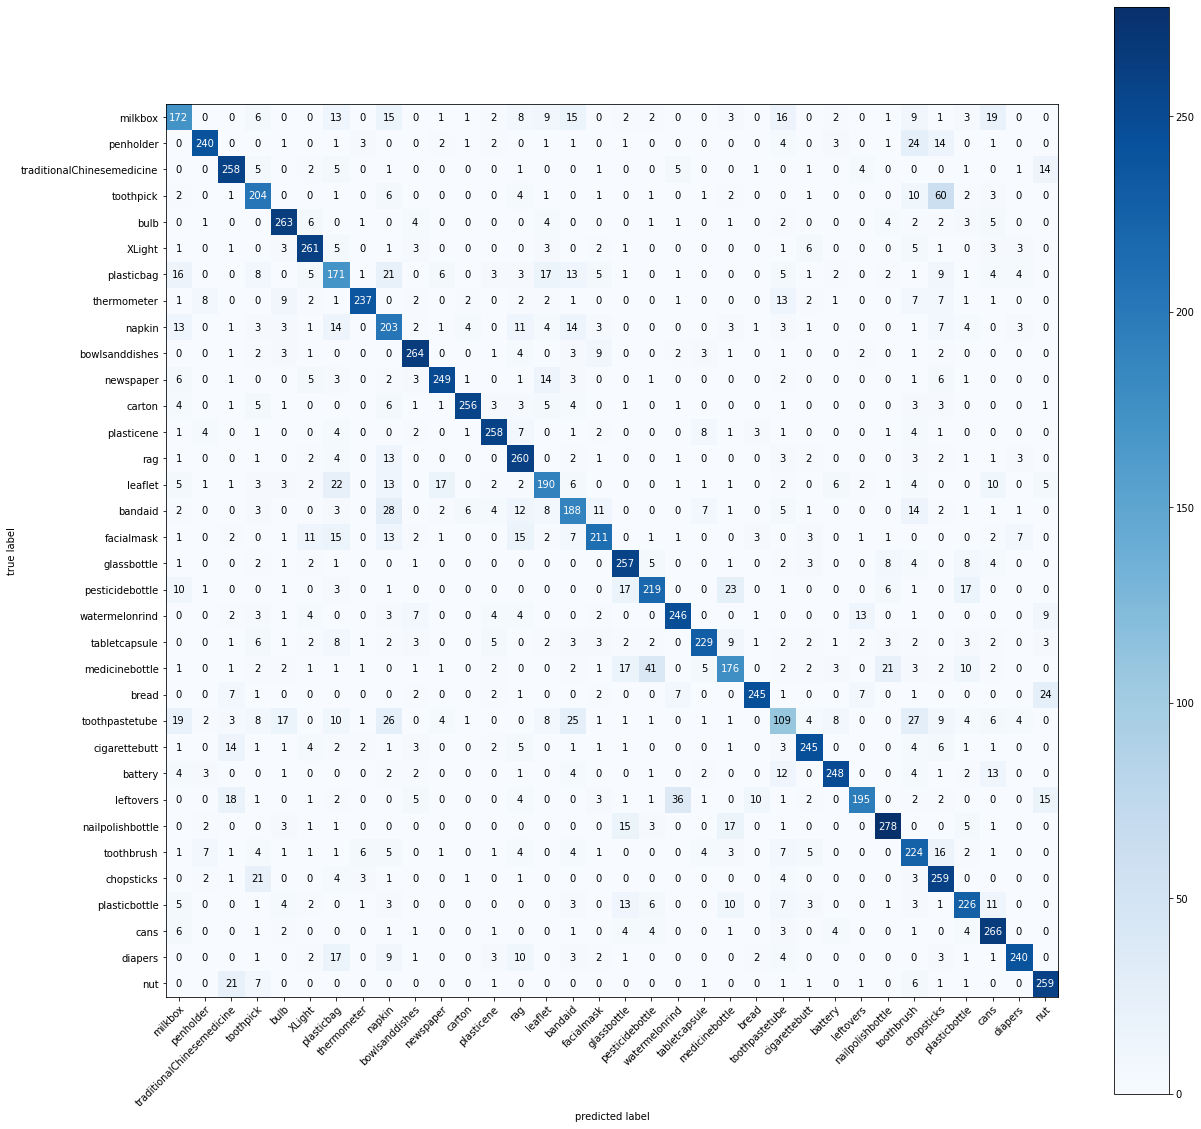

In [6]:
cm = confusion_matrix(y_true, y_pred, labels=labels)
fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=labels,colorbar=True,figsize=(20,20))
plt.show()

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(y_true, y_pred))

                            precision    recall  f1-score   support

                    XLight       0.82      0.87      0.84       300
                   bandaid       0.62      0.63      0.62       300
                   battery       0.89      0.83      0.86       300
            bowlsanddishes       0.85      0.88      0.87       300
                     bread       0.92      0.82      0.86       300
                      bulb       0.82      0.88      0.85       300
                      cans       0.74      0.89      0.81       300
                    carton       0.93      0.85      0.89       300
                chopsticks       0.62      0.86      0.72       300
             cigarettebutt       0.86      0.82      0.84       300
                   diapers       0.90      0.80      0.85       300
                facialmask       0.81      0.70      0.75       300
               glassbottle       0.77      0.86      0.81       300
                   leaflet       0.70      0.63